In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.model_selection import BaseCrossValidator, TimeSeriesSplit
from lightgbm import LGBMClassifier

import my_modules # 自作モジュール

In [2]:
names = [
    "race_id",
    "year",
    "month",
    "day",
    "times",
    "place",
    "daily",
    "race_num",
    "horse",
    "jockey_id",
    "horse_N",
    "waku_num",
    "horse_num",
    "class_code",
    "track_code",
    "corner_num",
    "dist",
    "state",
    "weather",
    "age_code",
    "sex",
    "age",
    "basis_weight",
    "blinker",
    "weight",
    "inc_dec",
    "weight_code",
    "win_odds",
    "rank",
    "time_diff",
    "time",
    "corner1_rank",
    "corner2_rank",
    "corner3_rank",
    "corner4_rank",
    "last_3F_time",
    "last_3F_rank",
    "Ave_3F",
    "PCI",
    "last_3F_time_diff",
    "leg",
    "pop",
    "prize",
    "error_code",
    "father",
    "mother",
    "id"
]


In [3]:
df = pd.read_csv("record_data_2023.csv", encoding="shift-jis", header=None, names=names)
df.head()

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,...,Ave_3F,PCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,id
0,202307220101010101,23,7,22,1,札幌,1,1,ウィスピースノー,1095,...,35.8,53.8,0.8,後方,5.0,55,0,ワールドエース,ハイリマイリ,2021100648
1,202307220101010102,23,7,22,1,札幌,1,1,ロードスタウト,1157,...,35.6,51.4,0.6,中団,7.0,0,0,ロードカナロア,フィラデルフィア,2021100159
2,202307220101010103,23,7,22,1,札幌,1,1,コミックガール,1197,...,35.6,50.8,0.6,中団,4.0,0,0,シルバーステート,コイクレナイ,2021100265
3,202307220101010104,23,7,22,1,札幌,1,1,デビルシズカチャン,5339,...,35.3,51.1,0.3,先行,3.0,83,0,ベストウォーリア,シシリアンブリーズ,2021105553
4,202307220101010105,23,7,22,1,札幌,1,1,サトミノキラリ,1170,...,35.2,52.6,0.2,先行,1.0,550,0,ビッグアーサー,パレード,2021101429


#### レース前に得られない情報は削除

In [4]:
df2 = my_modules.common_process(df)

c:\Users\ken05\Documents\others\HORSE_RACING\my_modules.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_num"] = df["place"].replace(place_dict)


In [ ]:
model, prob = my_modules.simple_lightGBM(df2)
# 頭数ごとにloglossを出す
# 障害、ダート等でも分けてみる

logloss score:  0.4200792233


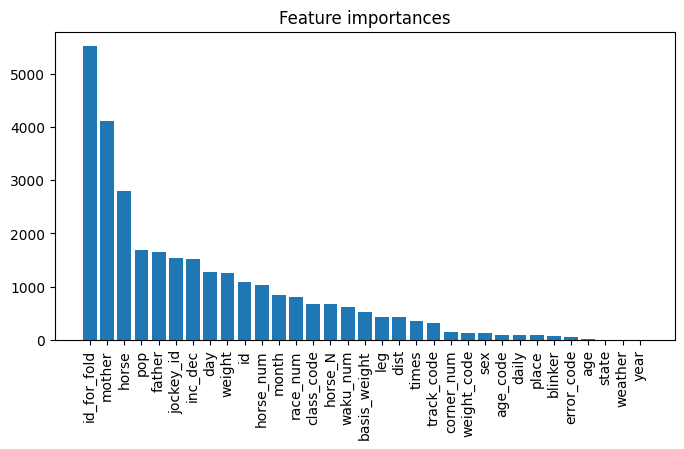

In [7]:
importances = model.feature_importances_

#値が小さい順のインデックスが返されるので、これを[::-1]で反転させている。
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(8,4))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), df2.drop(["target"], axis=1).columns[indices], rotation=90)

plt.show()

In [9]:
df2 = my_modules.calculator_prob(df2, prob)

c:\Users\ken20\Documents\workspaces\HORSE_RACING\my_modules.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_prob = df.groupby(["id_for_fold"])["unnormalized_prob"].sum()


In [10]:
df2.tail(3)

,year,month,day,times,place,daily,race_num,horse,jockey_id,horse_N,...,weight_code,leg,pop,error_code,father,mother,id,id_for_fold,target,first_prize_prob
47669,2023,12,28,5,中山,9,12,ブランデーロック,684,16,...,4,後方,6.0,0,マクフィ,グローリールピナス,2019107075,2023122806050912,0,0.000004
47670,2023,12,28,5,中山,9,12,ニシノスーベニア,5627,16,...,4,差し,4.0,0,ハービンジャー,リップル,2019101408,2023122806050912,0,0.063483
47671,2023,12,28,5,阪神,9,12,エイシンフェンサー,1095,16,...,4,先行,5.0,0,ファインニードル,エーシンパナギア,2020100105,2023122809050912,0,0.038853


In [11]:
df3 = my_modules.is_higher_than_odds(df2, df["win_odds"])

the rate of higher than odds:  0.13878167477764725
